## **Ques.1** - Gas_turbine.csv



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.


Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean

Ambient temperature (AT) C â€“6.23 37.10 17.71

Ambient pressure (AP) mbar 985.85 1036.56 1013.07

Ambient humidity (AH) (%) 24.08 100.20 77.87

Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93

Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56

Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43

Turbine after temperature (TAT) C 511.04 550.61 546.16

Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06

Turbine energy yield (TEY) MWH 100.02 179.50 133.51

Carbon monoxide (CO) mg/m3 0.00 44.10 2.37

Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
gas = pd.read_csv('/content/gas_turbines.csv')

In [4]:
seed = 7
np.random.seed(seed)

# split dataset into input and output
x = gas.drop(['TEY'],axis=1)
y = gas['TEY']

In [5]:
x

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.722  
1      82.776  
2      82.468  
3      82.670  
4      82.311  
...       ...  
15034  79.559  
15035  79.917  
15036  90.912  
15037  93.227  
15038  92.498  

[15039 rows x 10 columns]

In [6]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [7]:
gas.T

0          1          2          3          4          5      \
AT       6.8594     6.7850     6.8977     7.0569     7.3978     7.6998   
AP    1007.9000  1008.4000  1008.8000  1009.2000  1009.7000  1010.7000   
AH      96.7990    97.1180    95.9390    95.2490    95.1500    92.7080   
AFDP     3.5000     3.4998     3.4824     3.4805     3.4976     3.5236   
GTEP    19.6630    19.7280    19.7790    19.7920    19.7650    19.6830   
TIT   1059.2000  1059.3000  1059.4000  1059.6000  1059.7000  1059.8000   
TAT    550.0000   550.0000   549.8700   549.9900   549.9800   549.9700   
TEY    114.7000   114.7200   114.7100   114.7200   114.7200   114.7200   
CDP     10.6050    10.5980    10.6010    10.6060    10.6120    10.6260   
CO       3.1547     3.2363     3.2012     3.1923     3.2484     3.4467   
NOX     82.7220    82.7760    82.4680    82.6700    82.3110    82.4090   

          6          7          8          9      ...      15029      15030  \
AT       7.7901     7.7139     7.7975     8.0820  ...    10.4540    10.3050   
AP    1011.6000  1012.7000  1013.8000  1015.0000  ...  1004.5000  1004.6000   
AH      91.9830    91.3480    90.1960    88.5970  ...    98.3880    99.2820   
AFDP     3.5298     3.5088     3.5141     4.0612  ...     3.5555     3.5339   
GTEP    19.6590    19.6730    19.6340    23.4060  ...    18.9370    18.9090   
TIT   1060.0000  1059.8000  1060.1000  1083.0000  ...  1053.4000  1053.3000   
TAT    549.8700   549.9200   550.0900   550.2100  ...   550.0300   550.0000   
TEY    114.7100   114.7100   114.7200   131.7000  ...   110.7800   110.7800   
CDP     10.6440    10.6560    10.6440    11.6790  ...    10.3270    10.3280   
CO       3.4874     3.6043     3.3943     1.9081  ...     3.6133     3.7118   
NOX     82.4400    83.0100    82.2840    82.7820  ...    79.1890    79.1650   

          15031      15032      15033      15034      15035      15036  \
AT      10.2380    10.3470    10.1550     9.0301     7.8879     7.2647   
AP    1004.6000  1004.9000  1005.1000  1005.6000  1005.9000  1006.3000   
AH      99.9950   100.1700    99.9850    98.4600    99.0930    99.4960   
AFDP     3.8805     4.3198     3.7043     3.5421     3.5059     3.4770   
GTEP    21.2060    24.0480    19.8370    19.1640    19.4140    19.5300   
TIT   1067.5000  1084.3000  1059.7000  1049.7000  1046.3000  1037.7000   
TAT    550.3200   549.9800   549.9000   546.2100   543.2200   537.3200   
TEY    121.2600   133.7400   115.5200   111.6100   111.7800   110.1900   
CDP     11.0020    11.6850    10.5700    10.4000    10.4330    10.4830   
CO       2.6790     1.3663     3.3792     4.5186     4.8470     7.9632   
NOX     76.9850    74.5470    78.2350    79.5590    79.9170    90.9120   

          15037      15038  
AT       7.0060     6.9279  
AP    1006.8000  1007.2000  
AH      99.0080    97.5330  
AFDP     3.4486     3.4275  
GTEP    19.3770    19.3060  
TIT   1043.2000  1049.9000  
TAT    541.2400   545.8500  
TEY    110.7400   111.5800  
CDP     10.5330    10.5830  
CO       6.2494     4.9816  
NOX     93.2270    92.4980  

[11 rows x 15039 columns]

# Visualization

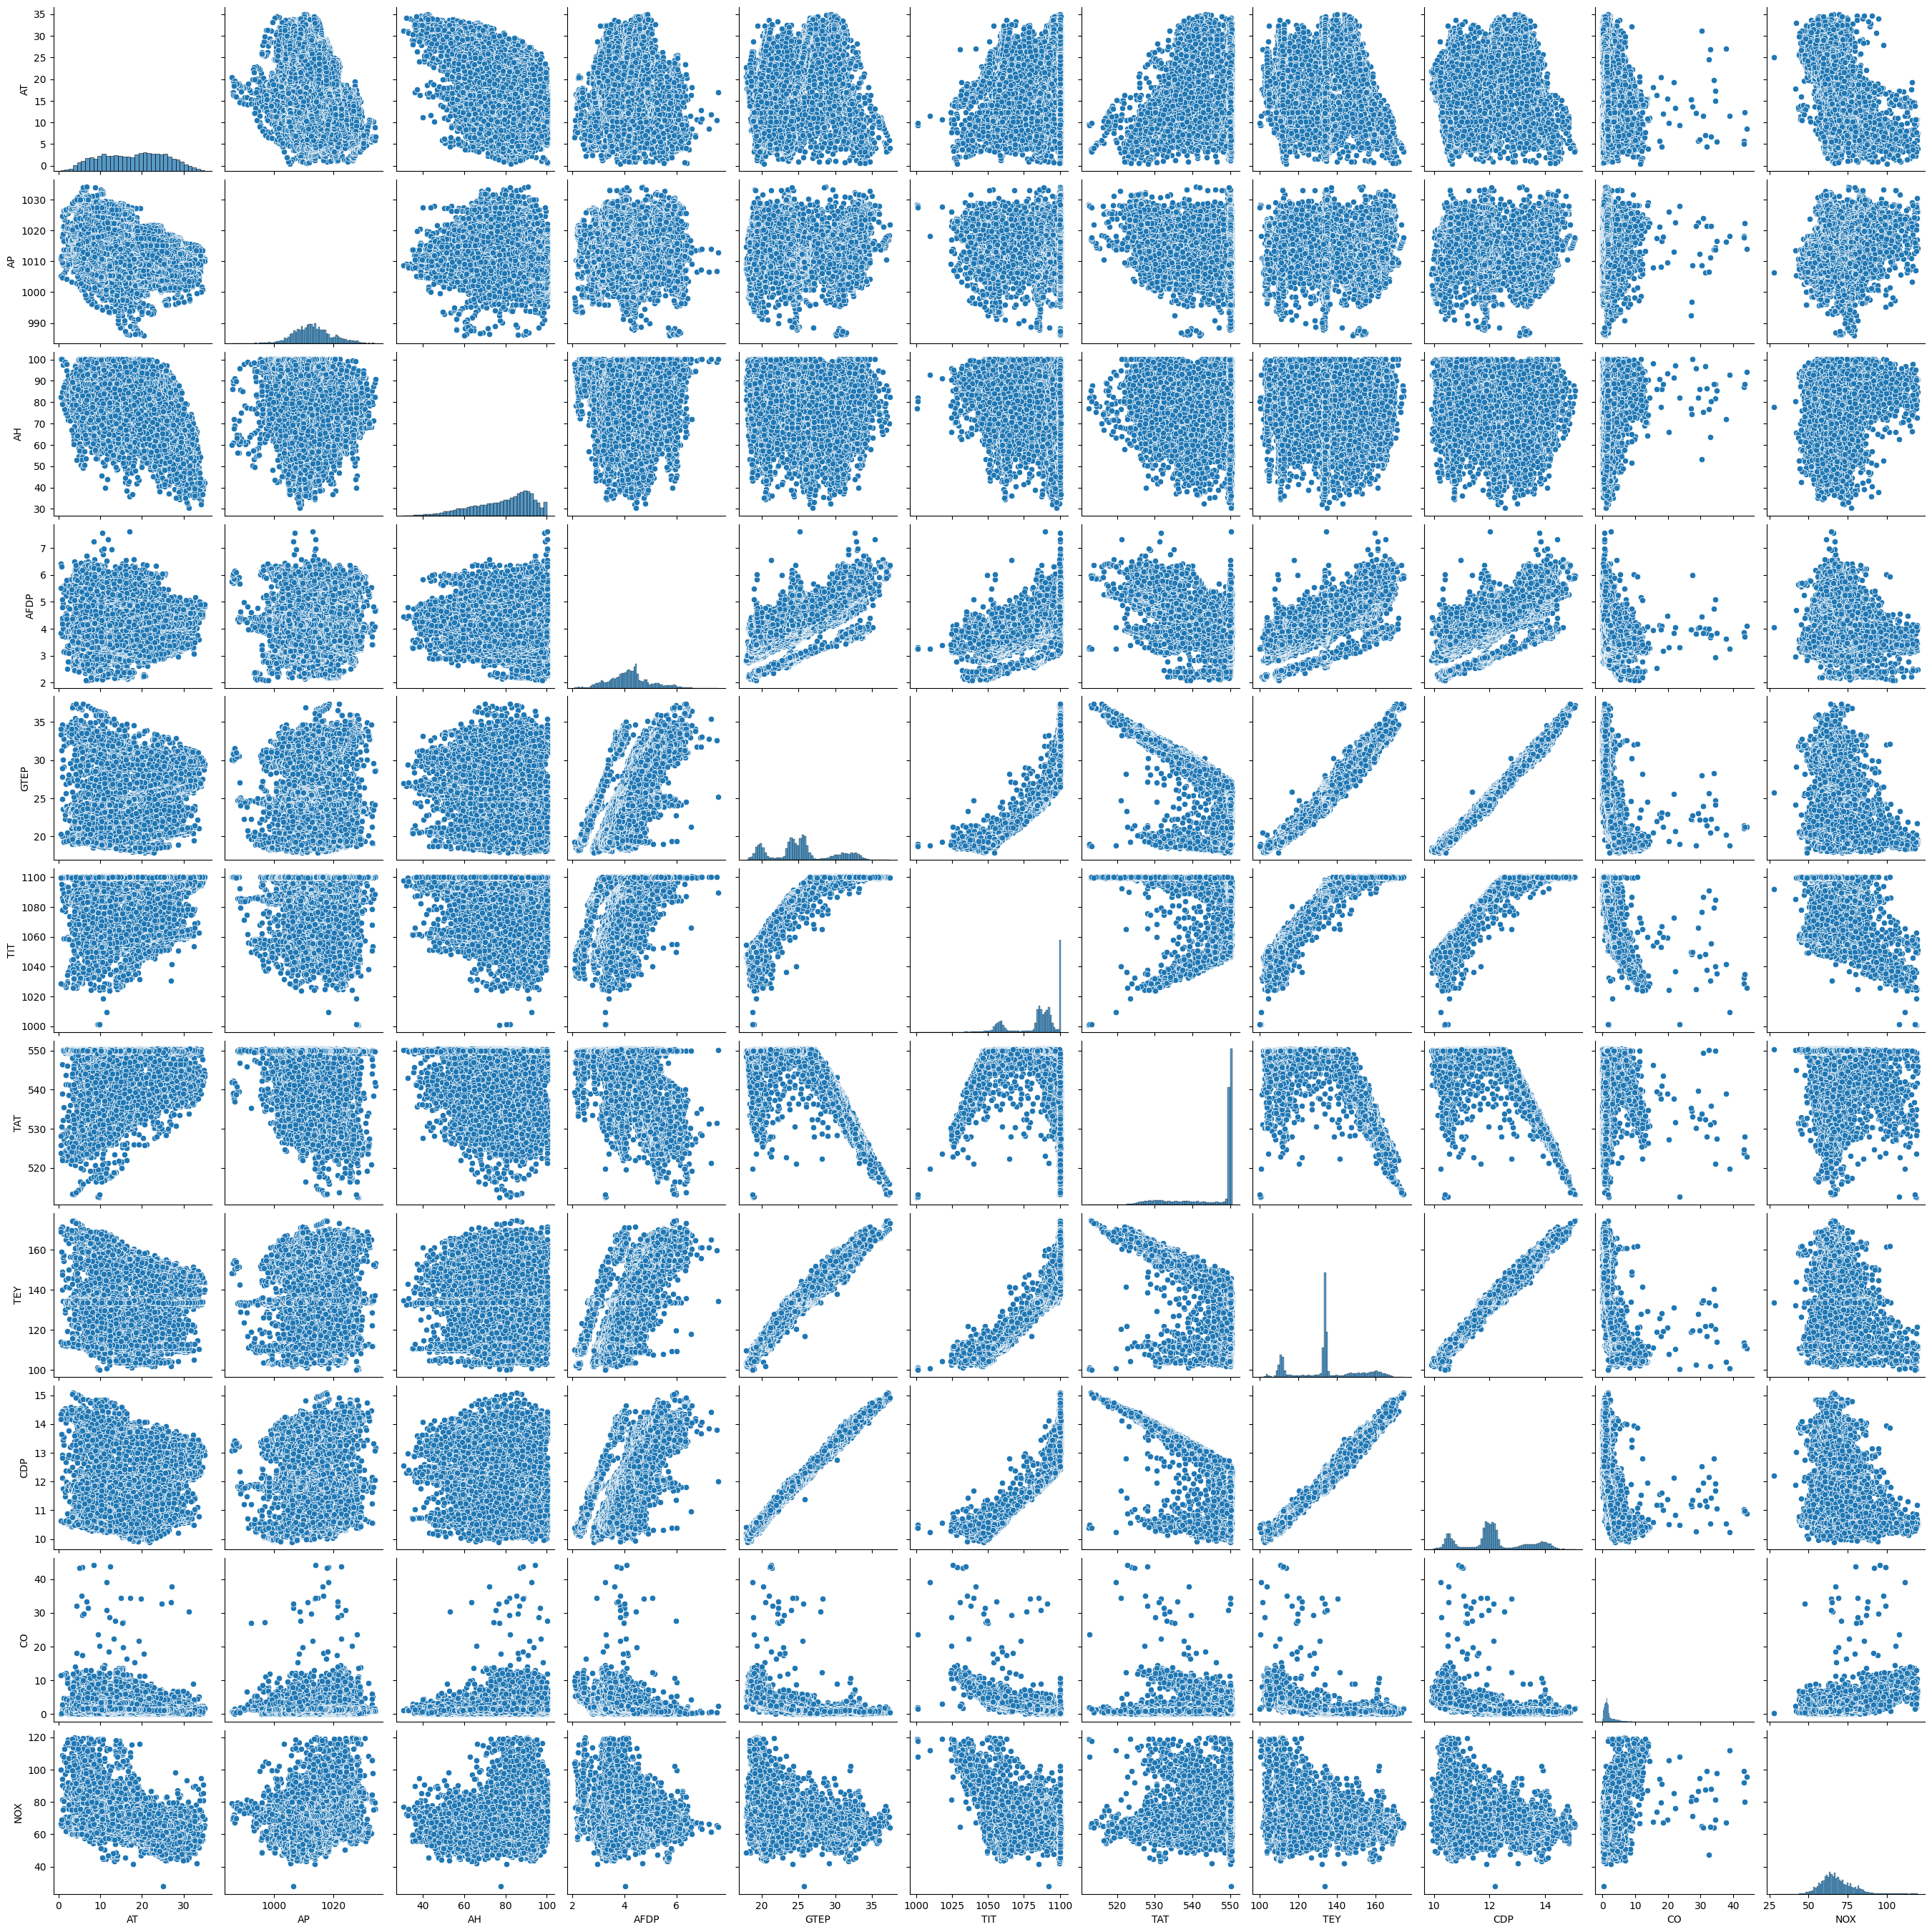

In [8]:
sns.pairplot(gas)

<Axes: >

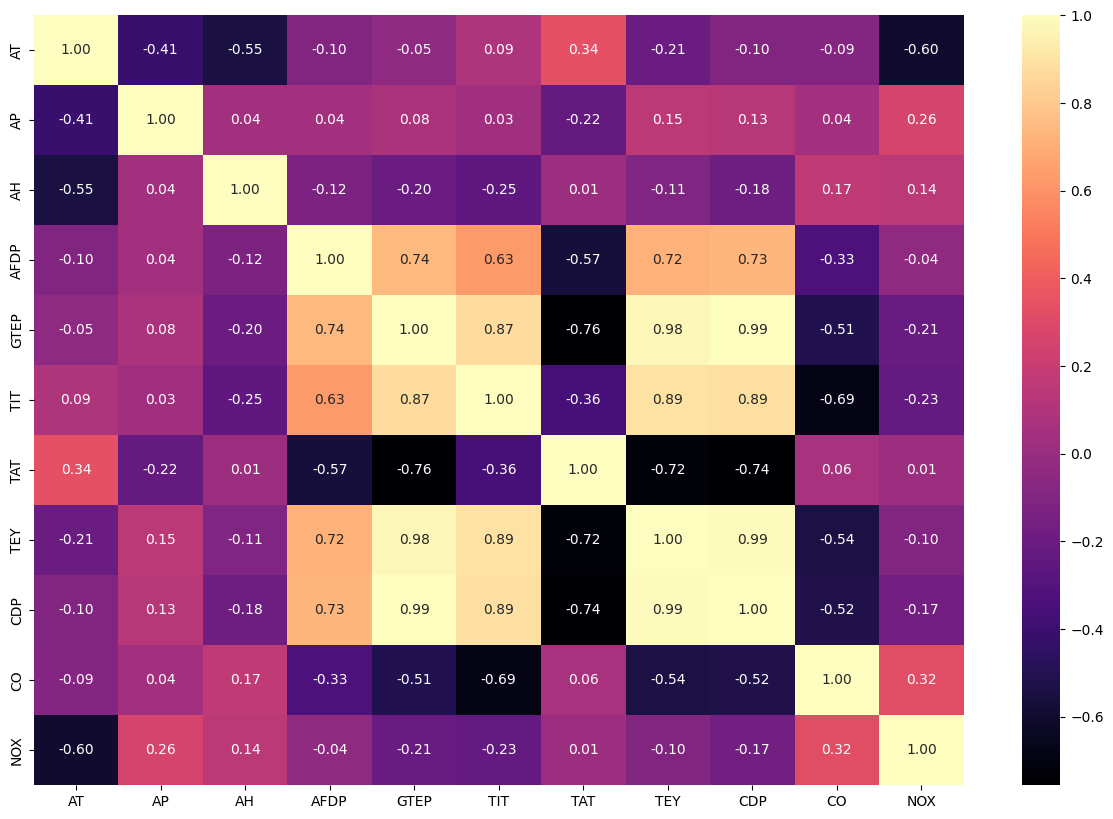

In [9]:
# Heatmap
plt.subplots(figsize=(15,10))
sns.heatmap(gas.corr(), cmap='magma', annot=True, fmt='.2f')

In [10]:
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return(x)

In [11]:
model = Sequential()
model.add(Dense(12, input_dim=10,  activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
x_norm = norm_func(x)

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit( x_norm,y, epochs=20, batch_size = 10)

Epoch 1/20
1504/1504 [==============================] - 4s 2ms/step - loss: -179873.5625 - accuracy: 0.0000e+00
Epoch 2/20
1504/1504 [==============================] - 3s 2ms/step - loss: -2172903.5000 - accuracy: 0.0000e+00
Epoch 3/20
1504/1504 [==============================] - 3s 2ms/step - loss: -7600341.0000 - accuracy: 0.0000e+00
Epoch 4/20
1504/1504 [==============================] - 4s 3ms/step - loss: -17185316.0000 - accuracy: 0.0000e+00
Epoch 5/20
1504/1504 [==============================] - 3s 2ms/step - loss: -31543204.0000 - accuracy: 0.0000e+00
Epoch 6/20
1504/1504 [==============================] - 3s 2ms/step - loss: -51304996.0000 - accuracy: 0.0000e+00
Epoch 7/20
1504/1504 [==============================] - 3s 2ms/step - loss: -77153400.0000 - accuracy: 0.0000e+00
Epoch 8/20
1504/1504 [==============================] - 4s 2ms/step - loss: -109728024.0000 - accuracy: 0.0000e+00
Epoch 9/20
1504/1504 [==============================] - 3s 2ms/step - loss: -149669936.0000

In [16]:
# evaluate the model
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]))

470/470 [==============================] - 2s 5ms/step - loss: -621423296512.0000 - accuracy: 0.0000e+00
accuracy: 0.00%


## **Ques.2** - forestfires.csv

PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [18]:
ff = pd.read_csv('/content/forestfires.csv')

## EDA

In [19]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [20]:
ff.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818    0.371006  ...    0.130913   
min      0.400000    0.000000     0.000000    0.000000  ...    0.000000   
25%      2.700000    0.000000     0.000000    0.000000  ...    0.000000   
50%      4.000000    0.000000     0.520000    0.000000  ...    0.000000   
75%      4.900000    0.000000     6.570000    0.000000  ...    0.000000   
max      9.400000    6.400000  1090.840000    1.000000  ...    1.000000   

         monthfeb    monthjan    monthjul    monthjun    monthmar    monthmay  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.038685    0.003868    0.061896    0.032882    0.104449    0.003868   
std      0.193029    0.062137    0.241199    0.178500    0.306138    0.062137   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthnov    monthoct    monthsep  
count  517.000000  517.000000  517.000000  
mean     0.001934    0.029014    0.332689  
std      0.043980    0.168007    0.471632  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

In [21]:
ff.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [22]:
ff.T

0      1      2      3      4      5      6      7      8    \
month            mar    oct    oct    mar    mar    aug    aug    aug    sep   
day              fri    tue    sat    fri    sun    sun    mon    mon    tue   
FFMC            86.2   90.6   90.6   91.7   89.3   92.3   92.3   91.5   91.0   
DMC             26.2   35.4   43.7   33.3   51.3   85.3   88.9  145.4  129.5   
DC              94.3  669.1  686.9   77.5  102.2  488.0  495.6  608.2  692.6   
ISI              5.1    6.7    6.7    9.0    9.6   14.7    8.5   10.7    7.0   
temp             8.2   18.0   14.6    8.3   11.4   22.2   24.1    8.0   13.1   
RH                51     33     33     97     99     29     27     86     63   
wind             6.7    0.9    1.3    4.0    1.8    5.4    3.1    2.2    5.4   
rain             0.0    0.0    0.0    0.2    0.0    0.0    0.0    0.0    0.0   
area             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
dayfri             1      0      0      1      0      0      0      0      0   
daymon             0      0      0      0      0      0      1      1      0   
daysat             0      0      1      0      0      0      0      0      0   
daysun             0      0      0      0      1      1      0      0      0   
daythu             0      0      0      0      0      0      0      0      0   
daytue             0      1      0      0      0      0      0      0      1   
daywed             0      0      0      0      0      0      0      0      0   
monthapr           0      0      0      0      0      0      0      0      0   
monthaug           0      0      0      0      0      1      1      1      0   
monthdec           0      0      0      0      0      0      0      0      0   
monthfeb           0      0      0      0      0      0      0      0      0   
monthjan           0      0      0      0      0      0      0      0      0   
monthjul           0      0      0      0      0      0      0      0      0   
monthjun           0      0      0      0      0      0      0      0      0   
monthmar           1      0      0      1      1      0      0      0      0   
monthmay           0      0      0      0      0      0      0      0      0   
monthnov           0      0      0      0      0      0      0      0      0   
monthoct           0      1      1      0      0      0      0      0      0   
monthsep           0      0      0      0      0      0      0      0      1   
size_category  small  small  small  small  small  small  small  small  small   

                 9    ...    507    508    509    510    511    512    513  \
month            sep  ...    aug    aug    aug    aug    aug    aug    aug   
day              sat  ...    fri    fri    fri    fri    sun    sun    sun   
FFMC            92.5  ...   91.0   91.0   91.0   91.0   81.6   81.6   81.6   
DMC             88.0  ...  166.9  166.9  166.9  166.9   56.7   56.7   56.7   
DC             698.6  ...  752.6  752.6  752.6  752.6  665.6  665.6  665.6   
ISI              7.1  ...    7.1    7.1    7.1    7.1    1.9    1.9    1.9   
temp            22.8  ...   25.9   25.9   21.1   18.2   27.8   27.8   21.9   
RH                40  ...     41     41     71     62     35     32     71   
wind             4.0  ...    3.6    3.6    7.6    5.4    2.7    2.7    5.8   
rain             0.0  ...    0.0    0.0    1.4    0.0    0.0    0.0    0.0   
area             0.0  ...    0.0    0.0   2.17   0.43    0.0   6.44  54.29   
dayfri             0  ...      1      1      1      1      0      0      0   
daymon             0  ...      0      0      0      0      0      0      0   
daysat             1  ...      0      0      0      0      0      0      0   
daysun             0  ...      0      0      0      0      1      1      1   
daythu             0  ...      0      0      0      0      0      0      0   
daytue             0  ...      0      0      0      0      0      0      0   
daywed             0  ...      0      0      0      

## Visualization

In [23]:
numerical_features = ff.describe(include=['int64', 'float']).columns
print(list(numerical_features))

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']


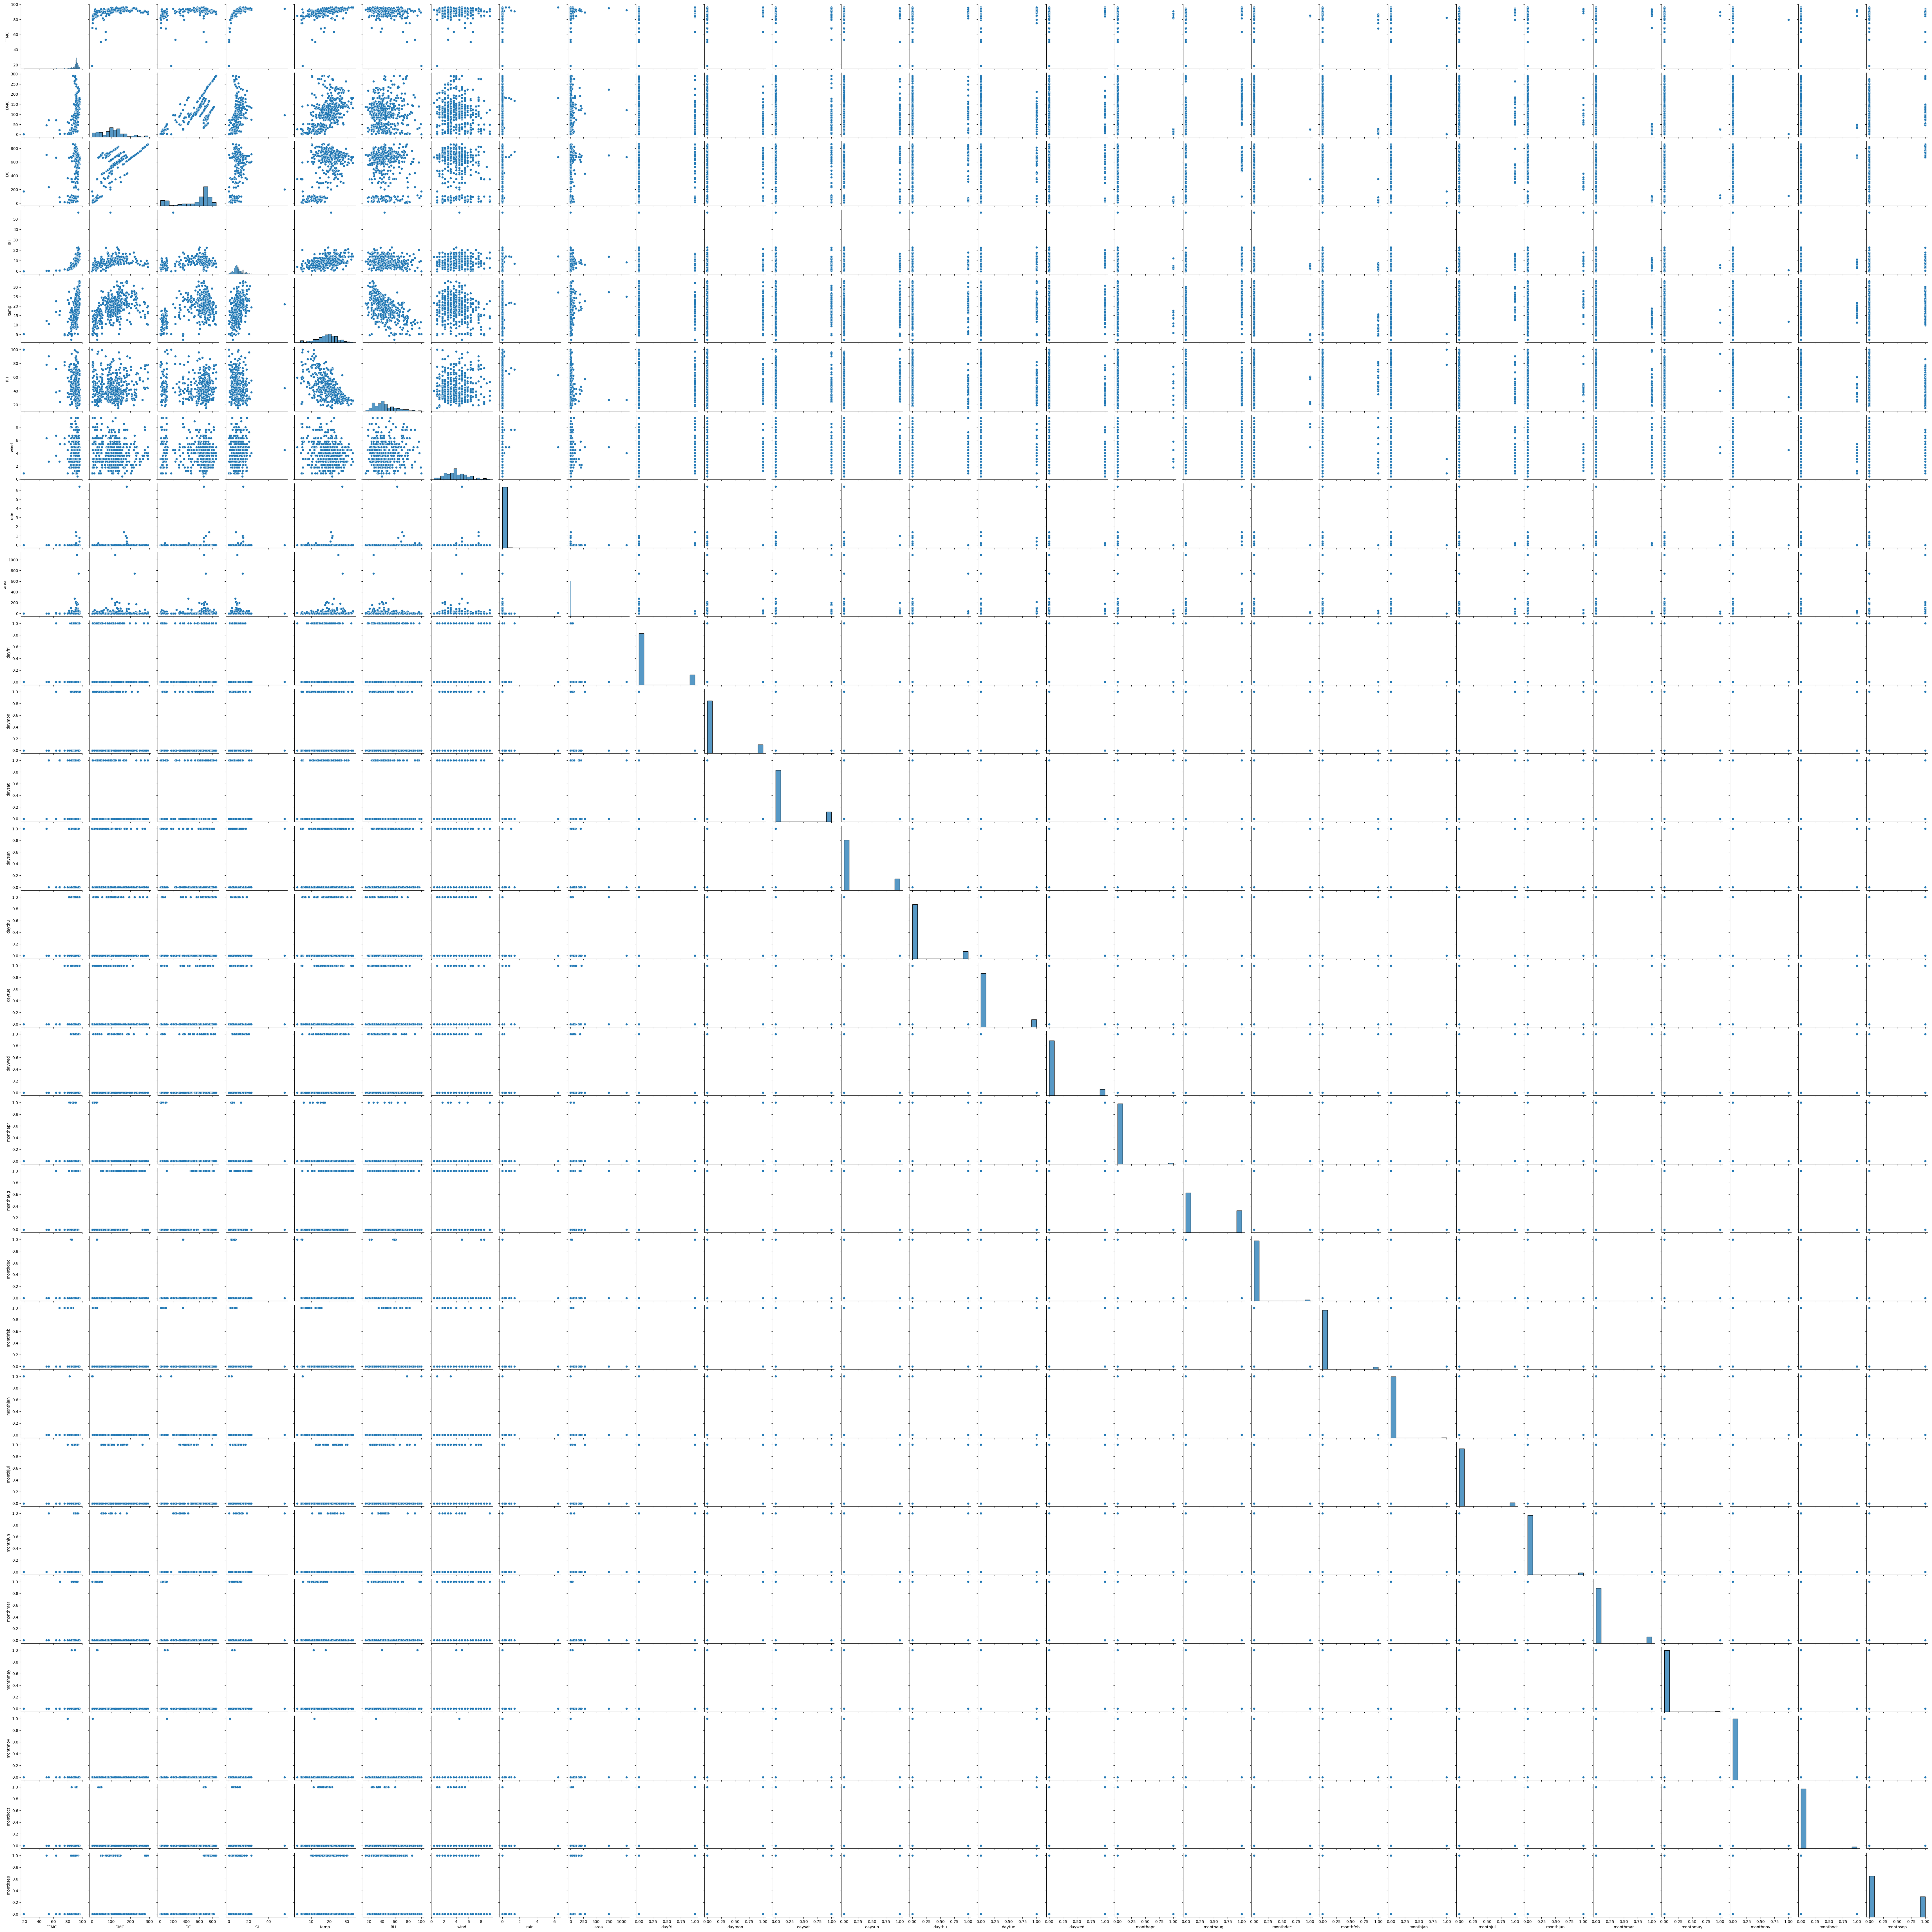

In [24]:
sns.pairplot(ff[numerical_features])
plt.show()

In [ ]:
ff_1 = ff.iloc[:,2:30]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
sc.fit(ff_1)
forest_norm = sc.transform(ff_1)
forest_norm

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 28)
pca_values = pca.fit_transform(forest_norm)
pca_values

array([[ 3.76670947e+00, -1.32025451e+00, -8.43971398e-01, ...,
        -6.53345819e-02, -5.63082526e-15, -3.06873518e-16],
       [ 3.90786263e-01,  8.31061522e-01, -1.10136513e+00, ...,
         3.42618601e-02, -3.05138387e-15,  1.39834704e-16],
       [ 6.90415596e-01,  1.17774562e+00, -1.22199841e+00, ...,
         2.63235187e-02,  6.49303149e-15,  4.74943282e-17],
       ...,
       [ 9.21634000e-01, -2.64543072e-01,  2.71921606e+00, ...,
        -2.97865814e-01, -8.07070708e-16, -6.88309096e-17],
       [-1.62054896e+00, -9.78838231e-01,  3.31987355e-01, ...,
         3.91949863e-02,  4.82256760e-16,  5.07182797e-17],
       [ 4.07590654e+00, -3.67440726e-01, -2.47151775e-01, ...,
        -2.50420726e-02, -3.63261563e-17,  3.83617004e-17]])

In [ ]:
var = pca.explained_variance_ratio_
var

array([1.35522746e-01, 6.85788793e-02, 6.23572652e-02, 5.32713255e-02,
       4.75942360e-02, 4.68009902e-02, 4.37490015e-02, 4.28025164e-02,
       4.08875728e-02, 4.01633268e-02, 3.92926854e-02, 3.83232321e-02,
       3.64221503e-02, 3.63217289e-02, 3.57856782e-02, 3.50087806e-02,
       3.35447704e-02, 3.24777366e-02, 3.04490902e-02, 3.00246758e-02,
       2.37167400e-02, 2.08329788e-02, 1.18357869e-02, 8.88449559e-03,
       4.55347471e-03, 7.98135931e-04, 2.67271490e-32, 7.04802364e-34])

In [ ]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([13.55, 20.41, 26.65, 31.98, 36.74, 41.42, 45.79, 50.07, 54.16,
       58.18, 62.11, 65.94, 69.58, 73.21, 76.79, 80.29, 83.64, 86.89,
       89.93, 92.93, 95.3 , 97.38, 98.56, 99.45, 99.91, 99.99, 99.99,
       99.99])

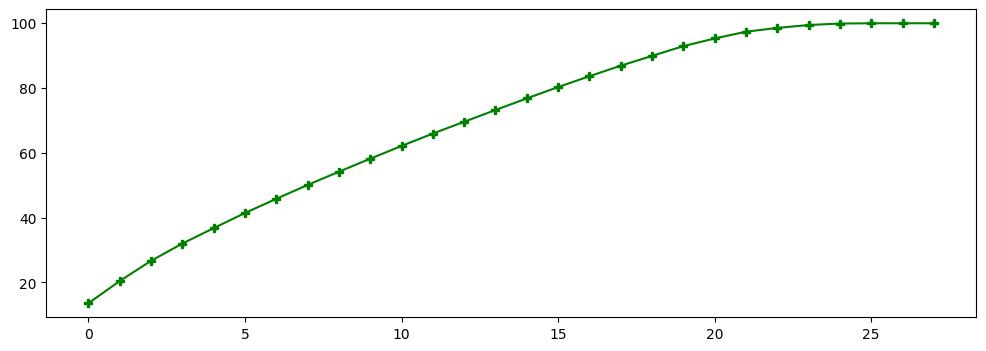

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(var1,color="green",marker = "P");


In [ ]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:24],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7',
 'pc8','pc9','pc10','pc11','pc12','pc13','pc14',
 'pc15','pc16','pc17','pc18','pc19','pc20','pc21',
 'pc22','pc23','pc24']),
 ff[['size_category']]], axis = 1)
finalDf.size_category.replace(('large','small'),(1,0),inplace=True)
finalDf

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0    3.766709 -1.320255 -0.843971 -1.994738 -1.453359  0.693985  0.308104   
1    0.390786  0.831062 -1.101365  1.400671  2.869388  0.965898 -2.795574   
2    0.690416  1.177746 -1.221998  2.442038  1.090630  0.390801 -1.586675   
3    3.359951 -1.161443  0.385728 -2.118328 -1.949601  1.027664 -0.179422   
4    2.974329 -0.842626  1.327788  0.038086 -1.124763 -0.574676 -0.777155   
..        ...       ...       ...       ...       ...       ...       ...   
512 -0.087560  0.153964  1.241810  1.536581  0.372425 -1.133422 -0.362287   
513  0.794366 -0.083966  2.670485  0.284995  0.223323 -0.904232 -0.014849   
514  0.921634 -0.264543  2.719216 -0.019643  0.242195 -0.966939 -0.118080   
515 -1.620549 -0.978838  0.331987  1.256638 -0.408164  0.735698  0.815510   
516  4.075907 -0.367441 -0.247152  0.979966  6.792273  5.943666 -1.639583   

          pc8       pc9      pc10  ...       pc16      pc17      pc18  \
0   -0.019764  0.010161 -0.437314  ...  -0.197543 -0.021839  0.688958   
1    0.041095 -0.548879  0.104500  ...  -2.503167  0.499649  0.563706   
2   -2.159336 -0.090580  0.260888  ...  -2.545144 -0.658411 -0.423618   
3   -0.250227 -0.620329 -1.343189  ...  -0.040887  0.017843  0.332572   
4    0.303635  0.861126 -2.024719  ...   0.844431  1.014944 -0.618231   
..        ...       ...       ...  ...        ...       ...       ...   
512  0.766946  0.818745 -0.289632  ...   0.300522  0.513876  0.539642   
513  0.107226  1.340049 -0.147246  ...   0.342367  0.485571  0.580150   
514  0.123010  1.290364 -0.177553  ...   0.332816  0.344047  0.122409   
515 -1.398344  0.076379 -0.005814  ...  -0.011739 -1.035533 -0.774382   
516  8.121827 -0.627980  4.953722  ...  10.467443 -7.333036  0.377340   

         pc19      pc20      pc21      pc22      pc23      pc24  size_category  
0    0.563603 -0.439596 -0.926619 -0.405425 -0.118719 -0.017933              0  
1   -0.703319 -1.535718 -0.892995  0.836590  0.204975  0.290771              0  
2    0.860550 -1.195230 -0.297870  0.743648  0.081757  0.345915              0  
3    1.164745 -1.632741 -0.817618  1.523710 -0.342302 -0.378420              0  
4    0.822853 -1.794109 -0.723371  2.020419 -0.545591  0.161735              0  
..        ...       ...       ...       ...       ...       ...            ...  
512 -0.052958  1.898628 -1.441786 -0.821192 -1.205707 -0.698666              1  
513  0.384984  0.086251 -0.970693 -1.353365 -1.254890 -1.212175              1  
514  0.313948  0.211157 -0.777731 -1.736711 -1.154127 -1.230040              1  
515 -0.216315  0.515791  0.080575 -0.055548 -0.067502 -0.311027              0  
516  8.870354 -1.074288  2.382433  1.042850  0.296436  0.125099              0  

[517 rows x 25 columns]

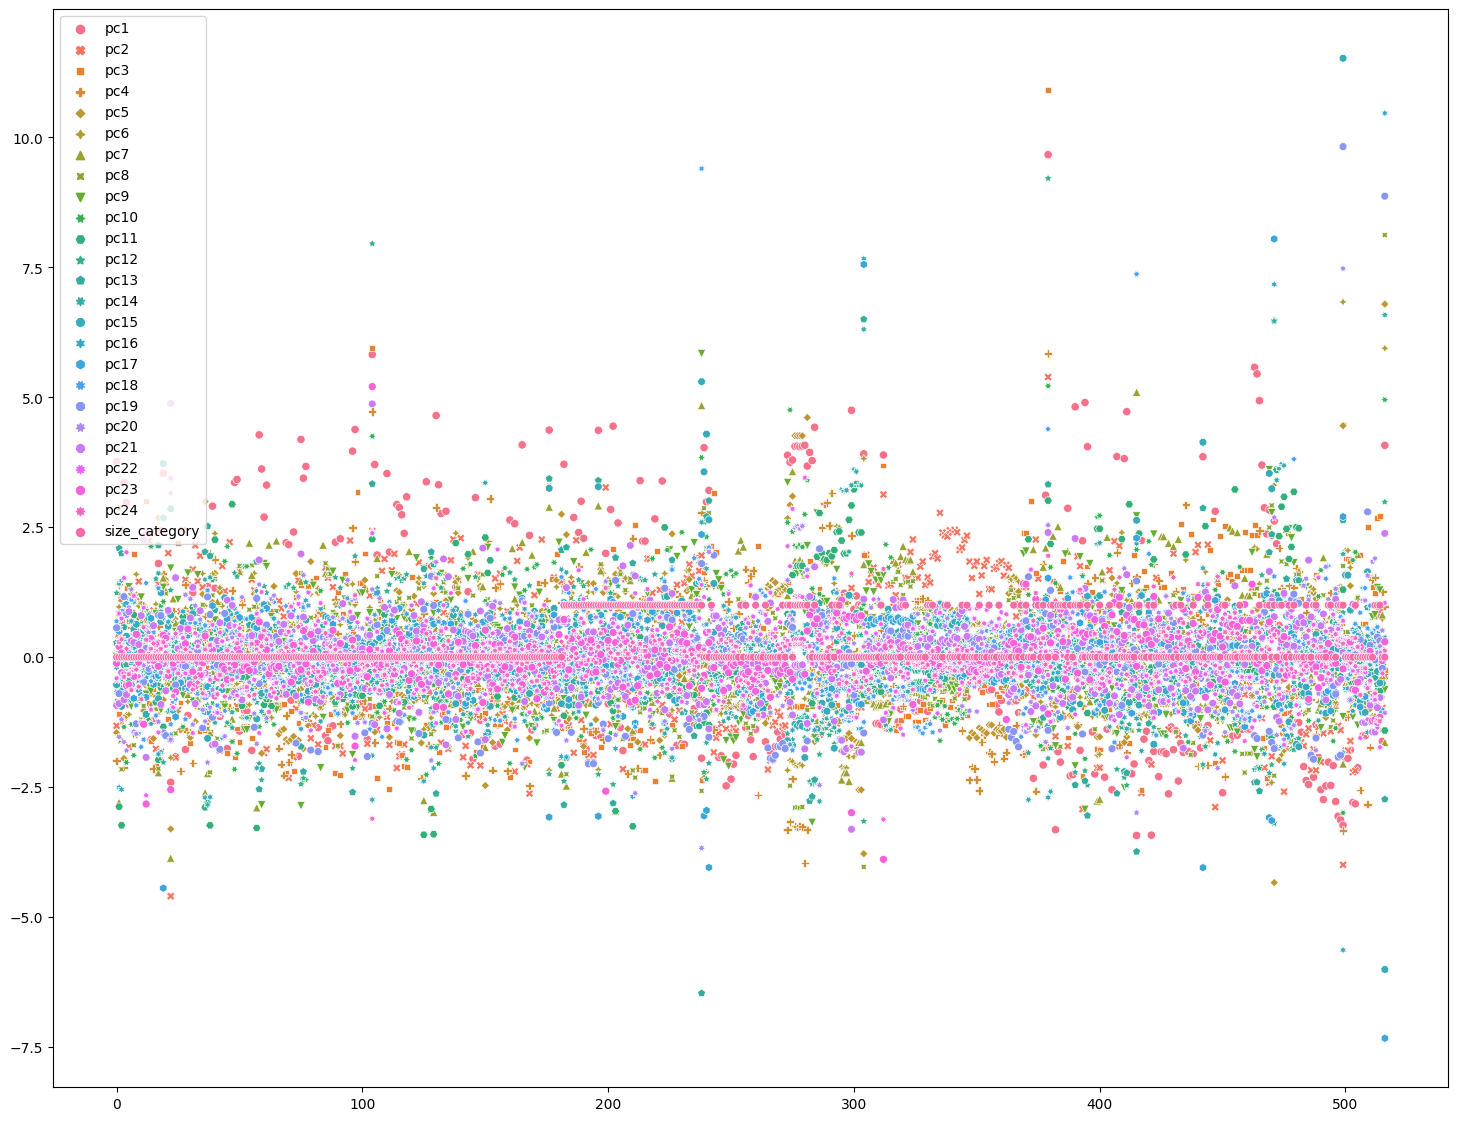

In [ ]:
import seaborn as sns
fig=plt.figure(figsize=(18,14))
sns.scatterplot(data=finalDf)

In [ ]:
array = finalDf.values
X = array[:,0:24]
Y = array[:,24]

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=24, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, validation_split=0.3, epochs=150, batch_size=10)

Epoch 1/150
37/37 [==============================] - 1s 8ms/step - loss: 0.6879 - accuracy: 0.5679 - val_loss: 0.6865 - val_accuracy: 0.5513
Epoch 2/150
37/37 [==============================] - 0s 3ms/step - loss: 0.6151 - accuracy: 0.6870 - val_loss: 0.6605 - val_accuracy: 0.5962
Epoch 3/150
37/37 [==============================] - 0s 5ms/step - loss: 0.5768 - accuracy: 0.7590 - val_loss: 0.6511 - val_accuracy: 0.6474
Epoch 4/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5538 - accuracy: 0.7618 - val_loss: 0.6471 - val_accuracy: 0.6923
Epoch 5/150
37/37 [==============================] - 0s 5ms/step - loss: 0.5367 - accuracy: 0.7562 - val_loss: 0.6465 - val_accuracy: 0.7179
Epoch 6/150
37/37 [==============================] - 0s 4ms/step - loss: 0.5249 - accuracy: 0.7618 - val_loss: 0.6468 - val_accuracy: 0.7115
Epoch 7/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5146 - accuracy: 0.7673 - val_loss: 0.6485 - val_accuracy: 0.7115
Epoch 8/150
3

In [ ]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.9168
accuracy: 91.68%
